In [1]:
# %%

import pandas as pd
import matplotlib.pyplot as plt
from typing import List
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# %%

IMAGENET = "ImageNet"
MSCOCO = "MS COCO"
NOTES = "notes"
METRIC = "metric"
SCORE = "score"
MODEL = "model"
def enter_result(
        image_net_acc: float,
        mscoco_recall: float,
        notes: str
):
    return {
        IMAGENET: image_net_acc,
        MSCOCO: mscoco_recall,
        NOTES: notes
    }

In [3]:
# %%

results = [
    enter_result(
        0.0795, 0.0261, "Baseline, no teacher"
    ),
    enter_result(
        0.1108, 0.0347, "0.5 Cross Entropy"
    ),
    enter_result(
        0.1162, 0.0376, "0.5 KL, lock logit scale 0.01"
    ),
    enter_result(
        0.1143, 0.0411, "0.5 Interactive, lock logit scale 0.01"
    ),
    enter_result(
        0.3141, 0.1447, "0.5 Feature"
    ),
    enter_result(
        0.3206, 0.1564, "0.5 Feature, lock logit scale 0.01"
    ),
    enter_result(
        0.3624, 0.183, "0.5 Feature, lock logit scale 0.01, 2xLR"
    ),
    enter_result(
        0.367, 0.1883, "0.5 Feature, lock logit scale 0.01, 3xLR"
    ),
    enter_result(
        0.3906, 0.2138, "0.5 Feature, lock logit scale 0.01, 4xLR, 3xWD"
    ),
    enter_result(
        0.3982, 0.2126, "0.5 Feature, lock logit scale 0.01, 3xLR, 2xWD"
    ),
    enter_result(
        0.3992, 0.2186, "0.5 Feature, lock logit scale 0.01, 3xLR, 3xWD, stop@epoch29"
    ),
    enter_result(
        0.5685, 0.3742, "0.5 Feature, init from teacher model"
    ),
    enter_result(
        0.6333, 0.4028, "Teacher"
    )
]

In [4]:
# %%

results_df0 = pd.DataFrame(results)
results_df = results_df0.melt(value_vars=[IMAGENET, MSCOCO], id_vars=[NOTES], var_name=METRIC, value_name=SCORE)
results_df0

,ImageNet,MS COCO,notes
0,0.0795,0.0261,"Baseline, no teacher"
1,0.1108,0.0347,0.5 Cross Entropy
2,0.1162,0.0376,"0.5 KL, lock logit scale 0.01"
3,0.1143,0.0411,"0.5 Interactive, lock logit scale 0.01"
4,0.3141,0.1447,0.5 Feature
5,0.3206,0.1564,"0.5 Feature, lock logit scale 0.01"
6,0.3624,0.1830,"0.5 Feature, lock logit scale 0.01, 2xLR"
7,0.3670,0.1883,"0.5 Feature, lock logit scale 0.01, 3xLR"
8,0.3906,0.2138,"0.5 Feature, lock logit scale 0.01, 4xLR, 3xWD"
9,0.3982,0.2126,"0.5 Feature, lock logit scale 0.01, 3xLR, 2xWD"


In [5]:
print(results_df0.to_latex(index=False))

\begin{tabular}{rrl}
\toprule
ImageNet & MS COCO & notes \\
\midrule
0.079500 & 0.026100 & Baseline, no teacher \\
0.110800 & 0.034700 & 0.5 Cross Entropy \\
0.116200 & 0.037600 & 0.5 KL, lock logit scale 0.01 \\
0.114300 & 0.041100 & 0.5 Interactive, lock logit scale 0.01 \\
0.314100 & 0.144700 & 0.5 Feature \\
0.320600 & 0.156400 & 0.5 Feature, lock logit scale 0.01 \\
0.362400 & 0.183000 & 0.5 Feature, lock logit scale 0.01, 2xLR \\
0.367000 & 0.188300 & 0.5 Feature, lock logit scale 0.01, 3xLR \\
0.390600 & 0.213800 & 0.5 Feature, lock logit scale 0.01, 4xLR, 3xWD \\
0.398200 & 0.212600 & 0.5 Feature, lock logit scale 0.01, 3xLR, 2xWD \\
0.399200 & 0.218600 & 0.5 Feature, lock logit scale 0.01, 3xLR, 3xWD, stop@epoch29 \\
0.568500 & 0.374200 & 0.5 Feature, init from teacher model \\
0.633300 & 0.402800 & Teacher \\
\bottomrule
\end{tabular}



In [6]:
# %%

def plot(df: pd.DataFrame, notes: List[str], row_names: List[str]):
    # https://stackoverflow.com/questions/70737222/multiple-multiple-bar-graphs-using-matplotlib
    mask = df[NOTES].isin(notes)
    filtered_df = results_df[mask].reset_index()

    row_names = pd.DataFrame(row_names)
    row_names.index = notes
    row_names = [row_names.loc[filtered_df[NOTES][i]].item() for i in range(len(filtered_df))]
    filtered_df[MODEL] = row_names


    g = sns.catplot(
        x=MODEL, 
        hue=METRIC, 
        y=SCORE, 
        data=filtered_df, 
        kind="bar", 
        height=3, 
        aspect=1, 
        palette='Set1'
    )
    # OFFSET = 0.02
    # min_ = max(filtered_df[SCORE].min() - OFFSET, 0)
    # max_ = filtered_df[SCORE].max() + OFFSET
    for ax in g.axes.flat[1:]:
        sns.despine(ax=ax, left=True)
    for ax in g.axes.flat:
        # ax.set_ylim([min_, max_])
        ax.set_xlabel(ax.get_title())
        ax.set_title('')
        ax.margins(x=0.1) # slightly more margin as a separation
    plt.subplots_adjust(wspace=0, bottom=0.18, left=0.06)

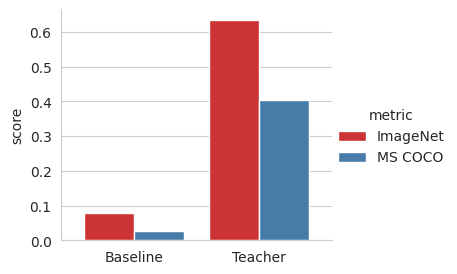

In [7]:
# %%

# we first compared baseline trained without teacher to teacher to verify that the teacher would be helpful
plot(
    results_df,
    ["Baseline, no teacher", "Teacher"], 
    ["Baseline", "Teacher"]
)

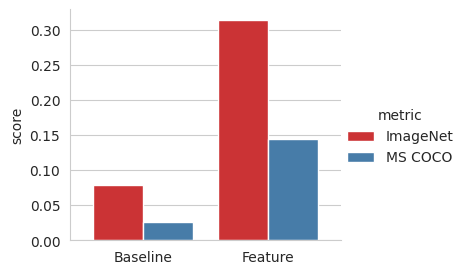

In [8]:
# %%

# we next tried out feature distillation
plot(
    results_df, 
    ["Baseline, no teacher", "0.5 Feature"], 
    ["Baseline", "Feature"]
)

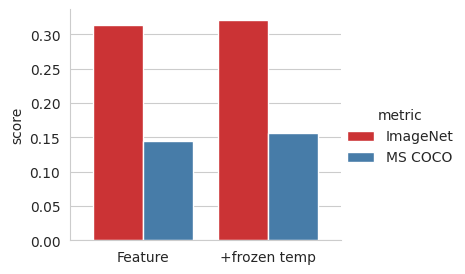

In [9]:
# %%

# locking the logit scale to the same as the teacher model helped
plot(
    results_df, 
    ["0.5 Feature", "0.5 Feature, lock logit scale 0.01"], 
    ["Feature", "+frozen temp"]
)

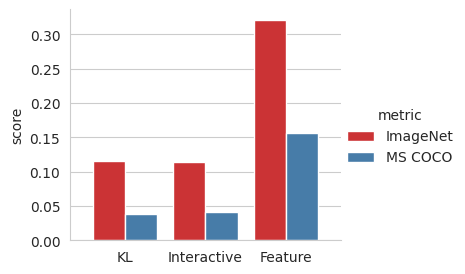

In [10]:
# %%

# We also tried interactive and KL
plot(
    results_df, 
    ["0.5 Feature, lock logit scale 0.01", 
     "0.5 Interactive, lock logit scale 0.01", 
     "0.5 KL, lock logit scale 0.01"], 
    ["Feature", "Interactive", "KL"]
)

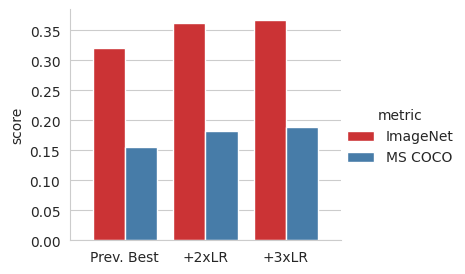

In [11]:
# %%

# increasing LR helped 
plot(
    results_df, 
    ["0.5 Feature, lock logit scale 0.01", 
     "0.5 Feature, lock logit scale 0.01, 2xLR", 
     "0.5 Feature, lock logit scale 0.01, 3xLR"], 
    ["Prev. Best", "+2xLR", "+3xLR"]
)

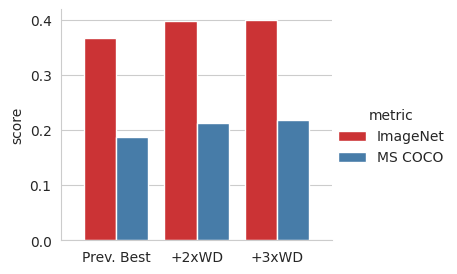

In [12]:
# %%

# increasing weight decay also helped
plot(
    results_df, 
    ["0.5 Feature, lock logit scale 0.01, 3xLR", 
     "0.5 Feature, lock logit scale 0.01, 3xLR, 2xWD", 
     "0.5 Feature, lock logit scale 0.01, 3xLR, 3xWD, stop@epoch29"], 
    ["Prev. Best", "+2xWD", "+3xWD"]
)

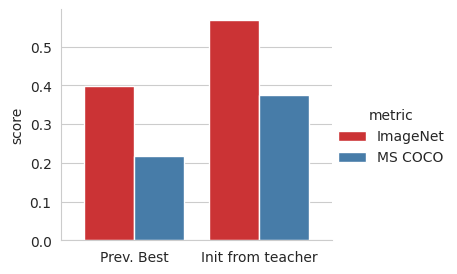

In [13]:
# %%

# our best results came when we init from the teacher model
plot(
    results_df, 
    ["0.5 Feature, lock logit scale 0.01, 3xLR, 3xWD, stop@epoch29", 
     "0.5 Feature, init from teacher model"], 
    ["Prev. Best", "Init from teacher"]
)